In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set_theme(context='notebook', style='darkgrid',palette='deep',font='sans serif',font_scale=1,color_codes=True,rc=None)


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("D:\Downloads & Documents\\israel_palestine_conflict.csv")
data.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781,NaN,51,8
1,2000,NOVEMBER,3838,NaN,112,22
2,2000,OCTOBER,5984,NaN,104,10
3,2000,SEPTEMBER,NaN,NaN,16,1
4,2001,DECEMBER,304,NaN,67,36


In [4]:
data.set_index("Year", inplace=True)

In [5]:
data.tail()

,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
Year,,,,,
2021,JANUARY,NaN,NaN,4,0
2021,FEBRUARY,NaN,NaN,1,0
2021,MARCH,NaN,NaN,4,0
2021,APRIL,NaN,NaN,1,0
2021,MAY,NaN,NaN,26,3


In [6]:
data.describe()

,Palestinians Killed,Israelis Killed
count,249.000000,249.000000
mean,40.160643,5.120482
std,129.148851,11.653323
min,0.000000,0.000000
25%,4.000000,0.000000
50%,12.000000,1.000000
75%,37.000000,5.000000
max,1590.000000,122.000000


From the above statistical information it is clear that the palestinians have been subjected to more atrocities than the israelis. 
The mean is higher for the palestinians as well due to this reason. The average number of people who have been killed over the course of the past 20 years have been more.
The standard deviation is higher for the palestinians showing more variation which indicates that the amount of people killed per year is highly variable.
25% which is the 1st quartile value is 4 which indicates that in 25% of the years fewer than 4 palestinians have been killed.
50% indicates that half of the years had 12 or fewers palistinians killed.
The 75% is the 3rd quartile which indicates that in about 25% of the years fewer than 12 palestines were killed.
Max and Min death values have been given for both nations.

In [7]:
# 249 rows and 6 columns is the shape of the table
data.shape

(249, 5)

In [8]:
data.columns

Index(['Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

In [9]:
data.isnull().sum()

Month                      0
Palestinians Injuries     54
Israelis Injuries        117
Palestinians Killed        0
Israelis Killed            0
dtype: int64

In [10]:
data = data.fillna({"Palestinians Injuries":"0", "Israelis Injuries":"0"})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 2000 to 2021
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Month                  249 non-null    object
 1   Palestinians Injuries  249 non-null    object
 2   Israelis Injuries      249 non-null    object
 3   Palestinians Killed    249 non-null    int64 
 4   Israelis Killed        249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ KB


In [12]:
# So, the code is essentially cleaning and converting certain columns in your DataFrame from string representations 
# of numbers (with commas) to actual numeric values,
# handling any non-numeric values by setting them to NaN.
# This is a common preprocessing step when working with data containing numeric information..
 
numerical_columns = ['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed' , 'Israelis Killed']
data[numerical_columns] = data[numerical_columns].replace({",", " "}, regex=True)
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

Now we will add a few more columns namely total incidents, palestinian fatality rate and israeli fatality rate.

In [13]:
data['Total Incidents'] = data['Palestinians Injuries'] + data['Israelis Injuries'] + data['Palestinians Killed'] + data['Israelis Killed']
data['Palestinian fatality rate'] = data['Palestinians Killed']/data['Total Incidents']
data['Israeli fatality rate'] = data['Israelis Killed']/data['Total Incidents']

In [14]:
Total_incidents = data['Total Incidents'].sum()
total_palestinian_incidents = (data['Palestinians Injuries'] + data['Palestinians Killed']).sum()
total_israeli_incidents = (data['Israelis Injuries'] + data['Israelis Killed']).sum()
palestinian_proportion = total_palestinian_incidents/Total_incidents
israeli_proportion = total_israeli_incidents/Total_incidents

In [15]:
data

,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Total Incidents,Palestinian fatality rate,Israeli fatality rate
Year,,,,,,,,
2000,DECEMBER,781.0,0.0,51,8,840.0,0.060714,0.009524
2000,NOVEMBER,3838.0,0.0,112,22,3972.0,0.028197,0.005539
2000,OCTOBER,5984.0,0.0,104,10,6098.0,0.017055,0.001640
2000,SEPTEMBER,0.0,0.0,16,1,17.0,0.941176,0.058824
2001,DECEMBER,304.0,0.0,67,36,407.0,0.164619,0.088452
...,...,...,...,...,...,...,...,...
2021,JANUARY,0.0,0.0,4,0,4.0,1.000000,0.000000
2021,FEBRUARY,0.0,0.0,1,0,1.0,1.000000,0.000000
2021,MARCH,0.0,0.0,4,0,4.0,1.000000,0.000000


In [16]:
data.isnull().sum()

Month                        0
Palestinians Injuries        2
Israelis Injuries            2
Palestinians Killed          0
Israelis Killed              0
Total Incidents              2
Palestinian fatality rate    2
Israeli fatality rate        2
dtype: int64

In [17]:
data =  data.fillna({"Total Incidents":0, "Palestinians Injuries":0, "Israelis Injuries":0, "Palestinian fatality rate":0, "Israeli fatality rate":0})
data.isnull().sum()

Month                        0
Palestinians Injuries        0
Israelis Injuries            0
Palestinians Killed          0
Israelis Killed              0
Total Incidents              0
Palestinian fatality rate    0
Israeli fatality rate        0
dtype: int64

NOW WE GROUP THE PALESTINIAN AND ISRAELI INCIDENTS AND FATALITY RATES TO MAKE A COMPARISON. After the grouping of data we have observed that the majority or rather most of the casualties have been within the palestinian borders. There have been very few injuries and deaths in israel which we can clearly discern from the fatality rates of both regions. We have also grouped this data based on year and month. On the basis of year the following years have faced the most incidents. 2000,2007,2014 and 2015 out of which 2014 has been the most lethal year till 2021. When it comes to months the following months on avg have the most number of incidents. August, december, november and october out of which december has been the most lethal month on an avg.

In [18]:
avg_pal_fatality_rate = np.mean(data['Palestinian fatality rate'])
palestinian_grouped_data = pd.DataFrame({'TOTAL_INCIDENTS': [total_palestinian_incidents],
                                         'AVG_FATALITY_RATE':[avg_pal_fatality_rate]})
palestinian_grouped_data

,TOTAL_INCIDENTS,AVG_FATALITY_RATE
0,119879.0,0.260522


In [19]:
avg_isr_fatality_rate = np.mean(data['Israeli fatality rate'])
Israeli_grouped_data = pd.DataFrame({'TOTAL_INCIDENTS': [total_israeli_incidents],
                                     'AVG_FATALITY_RATE':[avg_isr_fatality_rate]})
Israeli_grouped_data

,TOTAL_INCIDENTS,AVG_FATALITY_RATE
0,6376.0,0.029285


In [20]:
yearly_data = data.groupby('Year')[['Total Incidents', 'Palestinians Injuries', 'Palestinians Killed', 'Israelis Injuries', 'Israelis Killed']].mean()
yearly_data

,Total Incidents,Palestinians Injuries,Palestinians Killed,Israelis Injuries,Israelis Killed
Year,,,,,
2000,2731.750000,2650.750000,70.750000,0.000000,10.250000
2001,587.333333,532.166667,39.166667,0.000000,16.000000
2002,486.083333,365.166667,86.000000,0.000000,34.916667
2003,313.750000,249.333333,49.000000,0.000000,15.416667
2004,408.250000,334.083333,65.500000,0.000000,8.666667
2005,176.583333,115.416667,15.833333,41.083333,4.250000
2006,355.083333,266.583333,55.416667,31.416667,1.666667
2007,1345.416667,1285.500000,32.083333,26.833333,1.000000
2008,77.083333,0.000000,73.833333,0.000000,3.250000


In [21]:
monthly_data = data.groupby('Month')[['Total Incidents', 'Palestinians Injuries', 'Palestinians Killed', 'Israelis Injuries', 'Israelis Killed']].mean()
monthly_data

,Total Incidents,Palestinians Injuries,Palestinians Killed,Israelis Injuries,Israelis Killed
Month,,,,,
APRIL,266.095238,222.523810,28.809524,10.761905,4.000000
AUGUST,1010.550000,831.100000,49.500000,124.800000,5.150000
DECEMBER,1194.952381,1135.047619,45.000000,10.809524,4.095238
FEBRUARY,250.333333,214.666667,20.714286,11.333333,3.619048
JANUARY,493.190476,414.523810,64.857143,9.476190,4.333333
JULY,276.950000,243.000000,99.450000,10.950000,6.000000
JUNE,230.100000,195.300000,19.500000,8.450000,6.850000
MARCH,319.571429,264.190476,34.238095,11.952381,9.190476
MAY,335.888889,290.444444,29.222222,11.277778,4.944444


In [22]:
monthly_yearly_data = data.groupby(['Month','Year'])[['Total Incidents', 'Palestinians Injuries', 'Palestinians Killed', 'Israelis Injuries', 'Israelis Killed']].mean()
monthly_yearly_data

Total Incidents  Palestinians Injuries  Palestinians Killed  \
Month     Year                                                                
APRIL     2001            745.0                  715.0                 23.0   
          2002            815.0                  523.0                246.0   
          2003            368.0                  303.0                 59.0   
          2004            404.0                  346.0                 55.0   
          2005            207.0                  183.0                  5.0   
...                         ...                    ...                  ...   
SEPTEMBER 2016            235.0                  210.0                 11.0   
          2017            128.0                  118.0                  2.0   
          2018             26.0                    0.0                 25.0   
          2019              6.0                    0.0                  5.0   
          2020              1.0                    0.0                  1.0   

                Israelis Injuries  Israelis Killed  
Month     Year                                      
APRIL     2001                0.0              7.0  
          2002                0.0             46.0  
          2003                0.0              6.0  
          2004                0.0              3.0  
          2005               19.0              0.0  
...                           ...              ...  
SEPTEMBER 2016               14.0              0.0  
          2017                5.0              3.0  
          2018                0.0              1.0  
          2019                0.0              1.0  
          2020                0.0              0.0  

[249 rows x 5 columns]

According to the data we have gathered we can tell that 2014 was a lethal year and december is the most lethal month on an average. As for 2014 upon more research I was able to discern that the gaza war started in 2014 precisely on july 8th. it was conducted by the IDF in the gaza strip. The war was started by the continous *alleged* firing of missiles by hamas terrorists in gaza and also the abduction of 3 israeli soldiers by the hamas group. The gaza strip has been under israeli control since 1967 but 2014 was one of the most lethal years with attacks going on constantly for almost 50 days. The war started in july but august was the most lethal month with the injury and death rate being the highest on both sides.

In [23]:
july_2014_data = monthly_yearly_data.loc[('AUGUST', 2014)]
july_2014_data

Total Incidents          16705.0
Palestinians Injuries    13735.0
Palestinians Killed        614.0
Israelis Injuries         2347.0
Israelis Killed              9.0
Name: (AUGUST, 2014), dtype: float64

In [24]:
monthly_data_max = monthly_data['Palestinians Injuries'].idxmax()
monthly_data_max

'DECEMBER'

In [25]:
# This prints the year which has maximum number of injuries
yearly_data_max = yearly_data['Palestinians Injuries'].idxmax()
yearly_data_max

2000

In [26]:
# This prints the maximum amount of injuries
yearly_data_max = np.max(yearly_data['Palestinians Injuries'])
yearly_data_max

2650.75

In [27]:
july_data_2001 = monthly_yearly_data.loc[("DECEMBER",2000)]
july_data_2001

Total Incidents          840.0
Palestinians Injuries    781.0
Palestinians Killed       51.0
Israelis Injuries          0.0
Israelis Killed            8.0
Name: (DECEMBER, 2000), dtype: float64

DATA VISUALIZATION:

1) INJURIES FOR BOTH SIDES:

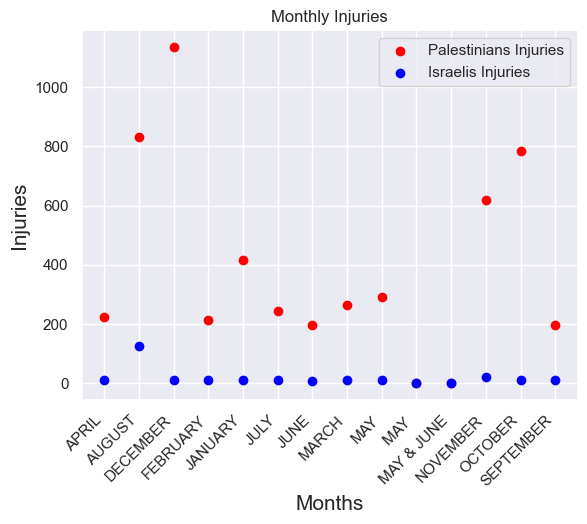

In [28]:
plt.scatter(monthly_data.index, monthly_data['Palestinians Injuries'],color='Red',label='Palestinians Injuries')
plt.scatter(monthly_data.index, monthly_data['Israelis Injuries'], color='Blue',label='Israelis Injuries')
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Injuries', fontsize = 15)
plt.title('Monthly Injuries')
# The below code is used because the month names earlier were overlapping.
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed
plt.legend()
plt.show()

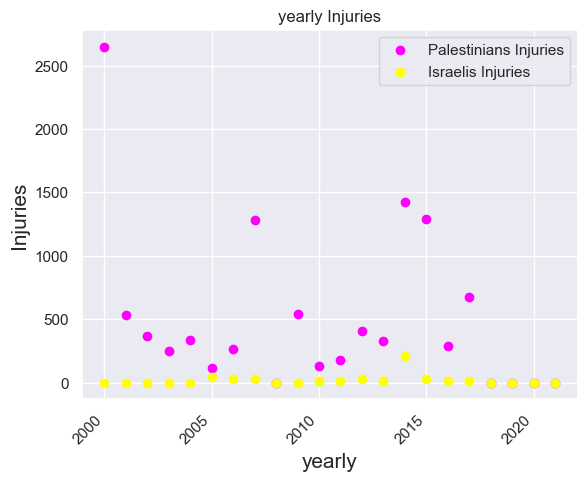

In [29]:
plt.scatter(yearly_data.index, yearly_data['Palestinians Injuries'],color='magenta',label='Palestinians Injuries')
plt.scatter(yearly_data.index, yearly_data['Israelis Injuries'], color='yellow',label='Israelis Injuries')
plt.xlabel('yearly', fontsize = 15)
plt.ylabel('Injuries', fontsize = 15)
plt.title('yearly Injuries')
# The below code is used because the month names earlier were overlapping.
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed
plt.legend()
plt.show()

2) DEATHS ON BOTH SIDES:

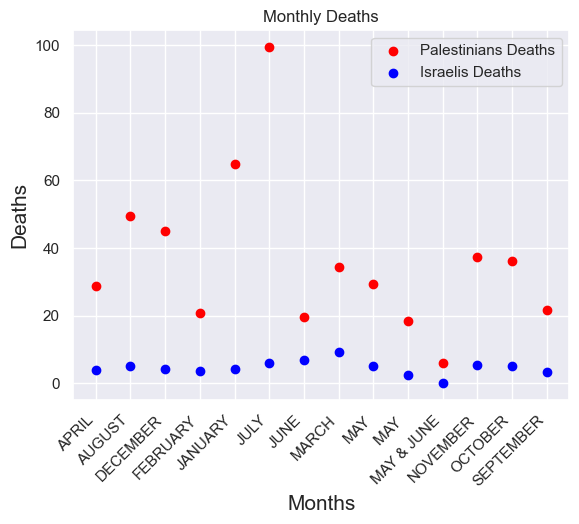

In [30]:
plt.scatter(monthly_data.index, monthly_data['Palestinians Killed'],color='Red',label='Palestinians Deaths')
plt.scatter(monthly_data.index, monthly_data['Israelis Killed'], color='Blue',label='Israelis Deaths')
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Deaths', fontsize = 15)
plt.title('Monthly Deaths')
# The below code is used because the month names earlier were overlapping.
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed
plt.legend()
plt.show()

The below graph depicts the yearly deaths of the israel palestine conflict. As we can tell from the graph that the figures between 2000 and 2010 are much higher than the rest fo the years. This was because of the 2nd intifida that took place during this time period. There is also a high point of deaths somewhere around 2014. 2014 was the year when gaza war started. It has been one of the most lethal years during the war. 

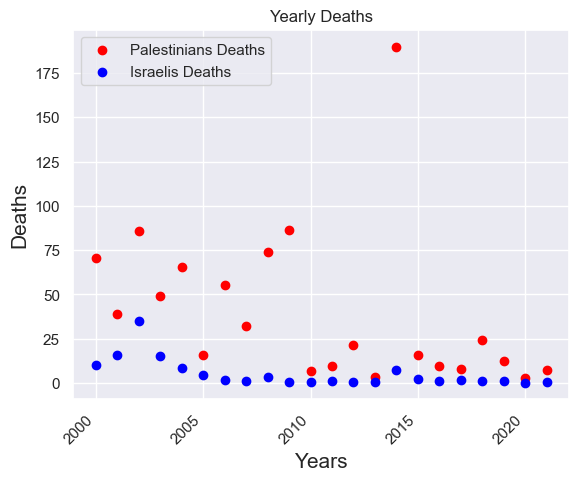

In [31]:
plt.scatter(yearly_data.index, yearly_data['Palestinians Killed'], color='Red',label='Palestinians Deaths')
plt.scatter(yearly_data.index, yearly_data['Israelis Killed'], color='Blue',label='Israelis Deaths')
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Deaths', fontsize = 15)
plt.title('Yearly Deaths')
# The below code is used because the month names earlier were overlapping.
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed
plt.legend()
plt.show()

3)MONTHLY YEARLY DATA:

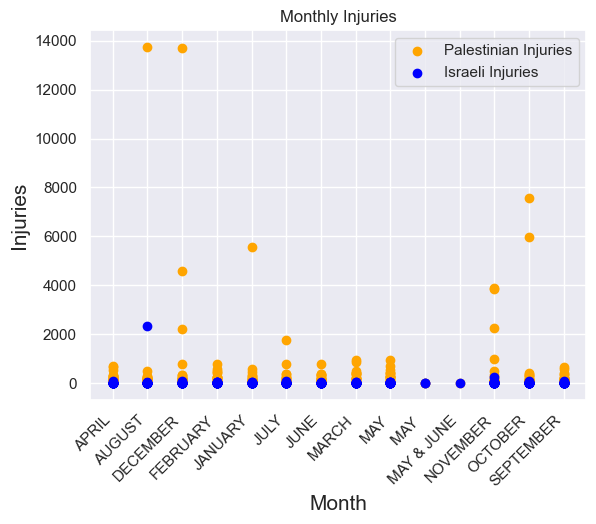

In [32]:
plt.scatter(monthly_yearly_data.index.get_level_values('Month'),monthly_yearly_data['Palestinians Injuries'],color='Orange',label='Palestinian Injuries')
plt.scatter(monthly_yearly_data.index.get_level_values('Month'),monthly_yearly_data['Israelis Injuries'],color='Blue',label='Israeli Injuries')
plt.xlabel('Month',fontsize=15)
plt.ylabel('Injuries',fontsize=15)

plt.title('Monthly Injuries')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed
plt.legend()

plt.show()

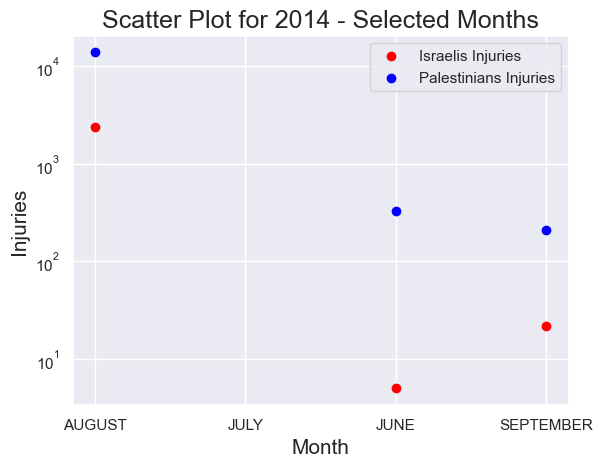

In [33]:
# Now we will try to print specific data

desired_year = 2014
desired_months = ['JUNE', 'JULY', 'AUGUST', 'SEPTEMBER']

filtered_data = monthly_yearly_data.loc[(monthly_yearly_data.index.get_level_values('Year') == desired_year) & (monthly_yearly_data.index.get_level_values('Month').isin(desired_months))]

plt.scatter(filtered_data.index.get_level_values('Month'), filtered_data['Israelis Injuries'], label='Israelis Injuries', color='red')
plt.scatter(filtered_data.index.get_level_values('Month'), filtered_data['Palestinians Injuries'], label='Palestinians Injuries', color='blue')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Injuries', fontsize=15)
plt.title(f'Scatter Plot for {desired_year} - Selected Months', fontsize=18)

# plt.yscale is used to change the scale of the axis if they are too vague. You can use log, linear or even logit(logit only for values between 0 and 1).
plt.yscale('log')

plt.legend()
plt.show()

BAR CHARTS:

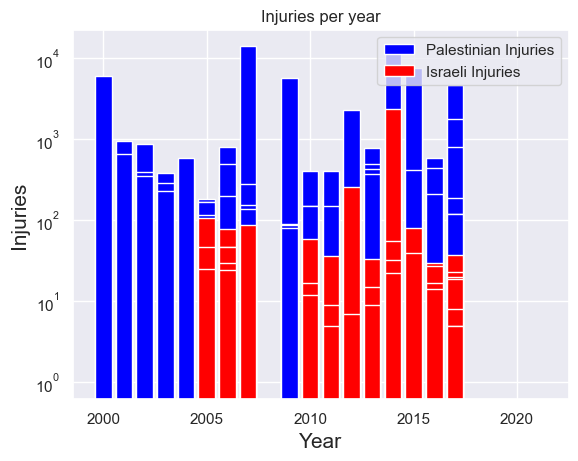

In [34]:
plt.bar(monthly_yearly_data.index.get_level_values('Year'), monthly_yearly_data['Palestinians Injuries'], color = 'Blue', label='Palestinian Injuries')
plt.bar(monthly_yearly_data.index.get_level_values('Year'), monthly_yearly_data['Israelis Injuries'], color='Red', label='Israeli Injuries')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Injuries', fontsize=15)
plt.title('Injuries per year')
plt.yscale('log')

plt.legend()
plt.show()